# Create Hexagons

This notebook creates hexagons lying above the bounding boxes of the city Dresden. For spatial analysis these hexagons are very helpful.

### What is done?
1. Load GeoJSON of Dresdens bounding box
2. Polyfill region of Dresden with Hexagons by given resolution
3. Plot and save the hexagons in a dataframe and csv
4. Match corresponding hexagons to start and endpoints of trips
5. Save them into csv file chunks
    - This has to be done because the file is too big to be uplaoded to Github
    - But as h3 package is not working on Windows, we have to upload these files so everyone has these information
    - The next notebook (03_MergeHexagonChunks) can then be run on Windows
    - It loads the chunks and merges them again, creating a Trips_Hexagons.csv (which is on gitignore)

### Input

- data/output/Trips.csv
- data/input/dresden_bounding_box.geojson

### Output
- data/output/hexagons-dresden.csv
- data/output/trips-hexagons/trips-hexagons-{id}.csv
    - (Multiple chunkfiles, each with antoher number as id)
    
---------------------------------------------------------

## 0. Pre-Installations of packages
Copy one of these lines into the next cell. Beware: pip does not like comments so paste it, run the cell and delete it again!
- pip install geopandas
- pip install h3
- pip install matplotlib
- pip install descartes

  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import geopandas
import os
import json
import numpy as np
from h3 import h3
from shapely.geometry import shape
import matplotlib.pyplot as plt

In [15]:
path_trips=os.path.join(os.getcwd(), '..', 'data', 'output', 'Trips.csv')
path_output=os.path.join(os.getcwd(), '..', 'data', 'output')
path_geo =os.path.join(os.getcwd(), '..', 'data', 'input', 'geodata', 'dresden_bounding_box.geojson')

print("Trips path:", path_trips)
print("Output path:", path_output)
print("GeoJSON path:", path_geo)

Trips path: /Users/mstroh/PycharmProjects/AAA_Jupyter_Explorers/notebooks/../data/output/Trips.csv
Output path: /Users/mstroh/PycharmProjects/AAA_Jupyter_Explorers/notebooks/../data/output
GeoJSON path: /Users/mstroh/PycharmProjects/AAA_Jupyter_Explorers/notebooks/../data/input/geodata/dresden_bounding_box.geojson


## 1. Load GeoJSON of Dresdens bounding box
Use Geopandas to read geojson file

In [16]:
city_bounding_box = geopandas.read_file(path_geo)
city_bounding_box_json_string = city_bounding_box.to_json()
city_bounding_box_json = json.loads(city_bounding_box_json_string)
city_bounding_box_poly = city_bounding_box_json["features"][0]

In [17]:
# Valid GeoJSON object
city_bounding_box_poly["geometry"]

{'type': 'Polygon',
 'coordinates': [[[13.746466, 51.178629],
   [13.964722, 51.06278],
   [13.815186, 50.974527],
   [13.572688, 51.0637],
   [13.746466, 51.178629]]]}

## 2. Polyfill region of Dresden with Hexagons by given resolution

In [18]:
# Computing hexagons for a given polygon
H3_HEXAGON_RESOLUTION = 7
polygon_obj = city_bounding_box_poly["geometry"] # your geo json object
hexagons = h3.polyfill(polygon_obj, res = H3_HEXAGON_RESOLUTION, geo_json_conformant = True)

In [19]:
# Returns only the index of each hexagon, not the geometries
hexagons

{'871f1b080ffffff',
 '871f1b082ffffff',
 '871f1b083ffffff',
 '871f1b086ffffff',
 '871f1b090ffffff',
 '871f1b091ffffff',
 '871f1b092ffffff',
 '871f1b093ffffff',
 '871f1b094ffffff',
 '871f1b095ffffff',
 '871f1b096ffffff',
 '871f1b098ffffff',
 '871f1b099ffffff',
 '871f1b09affffff',
 '871f1b09bffffff',
 '871f1b09cffffff',
 '871f1b09dffffff',
 '871f1b09effffff',
 '871f1b0b0ffffff',
 '871f1b0b1ffffff',
 '871f1b0b2ffffff',
 '871f1b0b3ffffff',
 '871f1b0b4ffffff',
 '871f1b0b5ffffff',
 '871f1b0b6ffffff',
 '871f1b19affffff',
 '871f1b19bffffff',
 '871f1b19effffff',
 '871f1b445ffffff',
 '871f1b460ffffff',
 '871f1b461ffffff',
 '871f1b462ffffff',
 '871f1b463ffffff',
 '871f1b464ffffff',
 '871f1b465ffffff',
 '871f1b466ffffff',
 '871f1b468ffffff',
 '871f1b469ffffff',
 '871f1b46affffff',
 '871f1b46bffffff',
 '871f1b46cffffff',
 '871f1b46dffffff',
 '871f1b46effffff',
 '871f1b540ffffff',
 '871f1b541ffffff',
 '871f1b542ffffff',
 '871f1b543ffffff',
 '871f1b545ffffff',
 '871f1b548ffffff',
 '871f1b549ffffff',


## 3. Plot and save the hexagons in a dataframe and csv
### 3.1. Convert H3 Indexes to Geometry Objects

In [20]:
# Create geo data frame
df_hexagons = geopandas.GeoDataFrame(list(hexagons), columns=['h3_hex_id'], crs="EPSG:4326")

df_hexagons['geometry'] = df_hexagons[(df_hexagons['h3_hex_id'].notna())].apply(lambda row: shape({"type": "Polygon",
                                           "coordinates": [h3.h3_to_geo_boundary(row["h3_hex_id"], geo_json=True)],
                                           "properties": ""
                                           }), axis=1)

### 3.2. Simply plot hexagons and print dataframe

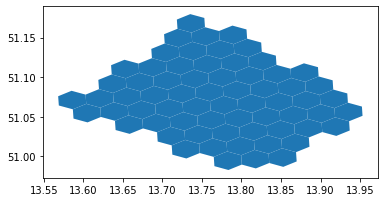

In [21]:
df_hexagons.plot()

In [22]:
df_hexagons

,h3_hex_id,geometry
0,871f1b545ffffff,"POLYGON ((13.63515 51.11510, 13.63597 51.10340..."
1,871f1b46bffffff,"POLYGON ((13.83432 51.00319, 13.83510 50.99147..."
2,871f1b096ffffff,"POLYGON ((13.76022 51.06952, 13.76102 51.05780..."
3,871f1b56dffffff,"POLYGON ((13.70214 51.15428, 13.70295 51.14258..."
4,871f1b0b5ffffff,"POLYGON ((13.79017 51.14177, 13.79096 51.13007..."
...,...,...
61,871f1b0b4ffffff,"POLYGON ((13.75544 51.13976, 13.75624 51.12806..."
62,871f1b466ffffff,"POLYGON ((13.69327 51.03034, 13.69407 51.01862..."
63,871f1b54cffffff,"POLYGON ((13.68842 51.10061, 13.68923 51.08890..."
64,871f1b19bffffff,"POLYGON ((13.77161 51.15832, 13.77241 51.14662..."


### 3.3. Save hexagons as csv

In [23]:
df_hexagons.to_csv(os.path.join(path_output, "hexagons-dresden.csv"))

## 4. Match corresponding hexagons to start and endpoints of trips

In [24]:
df_trips = pd.read_csv(path_trips, index_col="Unnamed: 0")
df_trips.head()

,p_spot_start,b_lock_types_start,p_maintenance_start,p_bike_racks_start,p_place_type_start,p_number_start,p_uid_start,b_number_start,p_free_racks_start,b_boardcomputer_start,...,p_booked_bikes_end,p_name_end,p_lat_end,air_deg,air_hum,rain_mm,rain_yn,sun_hour,wind_ms,trip_duration
0,False,analog_code_lock,False,0,12,0.0,12095573,93771,0,22532,...,0,BIKE 93771,51.046234,-3.3,75.3,0.0,0.0,0.0,4.3,28.0
1,True,analog_code_lock,False,0,0,4486.0,10299640,93576,0,0,...,0,BIKE 93576,51.049069,-3.3,75.3,0.0,0.0,0.0,4.3,10.0
2,True,frame_lock,False,0,0,4483.0,10299584,93440,0,7551004130,...,0,Wundtstr. / Zellescher Weg,51.028370,-3.3,75.3,0.0,0.0,0.0,4.3,26.0
3,False,analog_code_lock,False,0,12,0.0,12098234,93322,0,1265,...,0,BIKE 93322,51.041798,-3.3,75.3,0.0,0.0,0.0,4.3,2.0
4,True,analog_code_lock,False,0,0,4373.0,264575,93585,0,0,...,0,Friedensstraße/Conradstr.,51.071740,-3.3,75.3,0.0,0.0,0.0,4.3,28.0


In [25]:
df_trips.columns

Index(['p_spot_start', 'b_lock_types_start', 'p_maintenance_start',
       'p_bike_racks_start', 'p_place_type_start', 'p_number_start',
       'p_uid_start', 'b_number_start', 'p_free_racks_start',
       'b_boardcomputer_start', 'datetime_start', 'p_lng_start',
       'b_electric_lock_start', 'p_bikes_start', 'p_booked_bikes_start',
       'p_name_start', 'b_bike_type_start', 'p_lat_start', 'p_spot_end',
       'p_maintenance_end', 'p_bike_racks_end', 'p_place_type_end',
       'p_number_end', 'p_uid_end', 'p_free_racks_end', 'datetime_end',
       'p_lng_end', 'p_bikes_end', 'p_booked_bikes_end', 'p_name_end',
       'p_lat_end', 'air_deg', 'air_hum', 'rain_mm', 'rain_yn', 'sun_hour',
       'wind_ms', 'trip_duration'],
      dtype='object')

In [26]:
# Get the hexagon for a data point
# Assume we have a dataframe with a column for latitude and longitude representing "point data".
df_trips["h3_hex_id_start"] = df_trips.apply(lambda row: h3.geo_to_h3(row["p_lat_start"], row["p_lng_start"], H3_HEXAGON_RESOLUTION) if (row['p_lat_start'] and row['p_lng_start']) else 0, axis=1)
df_trips["h3_hex_id_end"] = df_trips.apply(lambda row: h3.geo_to_h3(row["p_lat_end"], row["p_lng_end"], H3_HEXAGON_RESOLUTION) if (row['p_lat_end'] and row['p_lng_end']) else 0, axis=1)
df_trips.head()

,p_spot_start,b_lock_types_start,p_maintenance_start,p_bike_racks_start,p_place_type_start,p_number_start,p_uid_start,b_number_start,p_free_racks_start,b_boardcomputer_start,...,p_lat_end,air_deg,air_hum,rain_mm,rain_yn,sun_hour,wind_ms,trip_duration,h3_hex_id_start,h3_hex_id_end
0,False,analog_code_lock,False,0,12,0.0,12095573,93771,0,22532,...,51.046234,-3.3,75.3,0.0,0.0,0.0,4.3,28.0,871f1b54bffffff,871f1b559ffffff
1,True,analog_code_lock,False,0,0,4486.0,10299640,93576,0,0,...,51.049069,-3.3,75.3,0.0,0.0,0.0,4.3,10.0,871f1b460ffffff,871f1b464ffffff
2,True,frame_lock,False,0,0,4483.0,10299584,93440,0,7551004130,...,51.028370,-3.3,75.3,0.0,0.0,0.0,4.3,26.0,871f1b559ffffff,871f1b460ffffff
3,False,analog_code_lock,False,0,12,0.0,12098234,93322,0,1265,...,51.041798,-3.3,75.3,0.0,0.0,0.0,4.3,2.0,871f1b559ffffff,871f1b559ffffff
4,True,analog_code_lock,False,0,0,4373.0,264575,93585,0,0,...,51.071740,-3.3,75.3,0.0,0.0,0.0,4.3,28.0,871f1b54bffffff,871f1b54bffffff


## 5. Save them into csv file chunks
- This has to be done because the file is too big to be uplaoded to Github
- But as h3 package is not working on Windows, we have to upload these files so everyone has these information
- The next notebook (03_MergeHexagonChunks) can then be run on Windows
- It loads the chunks and merges them again, creating a Trips_Hexagons.csv (which is on gitignore)

In [28]:
# Into how many chunks do you want to split the dataframe?
number_of_chunks = 5

for id, df_chunk in enumerate(np.array_split(df_trips, number_of_chunks)):
    df_chunk.to_csv(os.path.join(path_output, "trips-hexagons","trips-hexagons-{id}.csv").format(id=id))